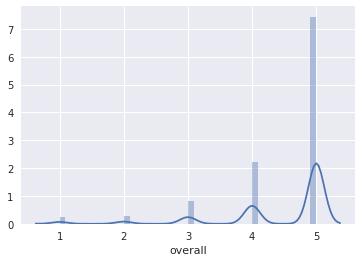

In [2]:
#Ratings Distribution Plot
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

sns.distplot(df.overall);

In [2]:
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import cross_validate


reader = Reader(rating_scale=(1, 5))
#reviewerID: user_ID
#asin: product_ID
#overall: ratings
data = Dataset.load_from_df(df[['reviewerID', 'asin', 'overall']], reader)

algo = SVD(n_epochs= 10, lr_all= 0.01, reg_all= 0.6)

cross_validate(algo, data, measures=['RMSE', 'MAE'], return_train_measures=True, cv=10, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9091  0.8769  0.8189  0.8756  0.8599  0.8713  0.8711  0.8499  0.8125  0.9161  0.8661  0.0316  
MAE (testset)     0.6659  0.6520  0.6195  0.6498  0.6369  0.6338  0.6465  0.6192  0.6167  0.6611  0.6401  0.0169  
RMSE (trainset)   0.7241  0.7270  0.7333  0.7272  0.7284  0.7269  0.7278  0.7298  0.7331  0.7233  0.7281  0.0031  
MAE (trainset)    0.5355  0.5368  0.5418  0.5398  0.5394  0.5381  0.5384  0.5414  0.5429  0.5357  0.5390  0.0024  
Fit time          0.34    0.28    0.44    0.41    0.30    0.32    0.42    0.28    0.35    0.27    0.34    0.06    
Test time         0.02    0.02    0.01    0.02    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.01    


{'fit_time': (0.34367823600769043,
  0.2756030559539795,
  0.43984413146972656,
  0.40635180473327637,
  0.29981088638305664,
  0.3154621124267578,
  0.41948866844177246,
  0.27547264099121094,
  0.34842681884765625,
  0.27426695823669434),
 'test_mae': array([0.66590453, 0.65204462, 0.61951048, 0.64983909, 0.63688865,
        0.63375565, 0.6464862 , 0.61922274, 0.61667823, 0.66109931]),
 'test_rmse': array([0.9091423 , 0.87691621, 0.81894186, 0.87557362, 0.85985343,
        0.87132325, 0.87108266, 0.84992861, 0.81246458, 0.91611953]),
 'test_time': (0.020557880401611328,
  0.021718978881835938,
  0.014471769332885742,
  0.018116474151611328,
  0.012398958206176758,
  0.007190227508544922,
  0.007711887359619141,
  0.007166862487792969,
  0.007180690765380859,
  0.012768268585205078),
 'train_mae': array([0.66590453, 0.65204462, 0.61951048, 0.64983909, 0.63688865,
        0.63375565, 0.6464862 , 0.61922274, 0.61667823, 0.66109931]),
 'train_rmse': array([0.9091423 , 0.87691621, 0.81894

In [54]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.001, 0.005, 0.01, 0.05, 0.1], 'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], return_train_measures=True, cv=10)

gs.fit(data)


print(gs.best_score['rmse'])


print(gs.best_params['rmse'])

0.8654327896304329
{'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.6}


In [60]:
from surprise import KNNBaseline
from surprise import KNNBasic

param_grid = {'bsl_options': {'method': ['als', 'sgd']},
              'k': range(2,40),
              'sim_options': {'name': ['cosine', 'pearson_baseline'],
                              'user_based': [False]}
              }

gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=10)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Estimating biases using als...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Estima

Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Done com

Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Computing the cosine similarity matrix...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done comput

Estimating biases using als...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine si

Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Estimating biases using als...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Computing the pearso

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Estimating biases using als...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Done computing similarity matrix

Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Done computing similarity matrix.
Estimating biases using als...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Computing the cosine similarity matrix...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing t

Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Estimating biases using als...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Comp

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Estimat

Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using sgd...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Done computing similarity matrix.
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Estimating biases using sgd...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Estimating biases using sgd...
Done computing similarity matrix.
Estima

Estimating biases using sgd...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Estimating biases using sgd...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Estimating biases using sgd...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Computing the cosine similarity matrix...
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing simila

Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing

Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Done computing similarity matrix.
Estimating biases using sgd...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson_baseline similarity ma

Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Estimating biases using sgd...
Done computing similarity matrix.
Estimating biases using sgd...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarit

Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Estimating biases using sgd...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Estimating biases using sgd...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing 

Estimating biases using sgd...
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Estima

Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Estimating biases using sgd...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Done comput

Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Estimating biases using sgd...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using sgd...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Estimating biases using sgd...

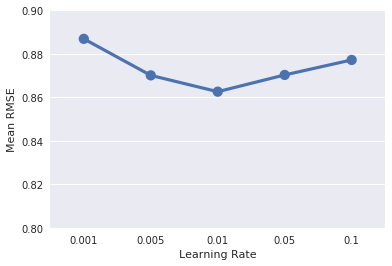

In [4]:
#Learning Rate Selection for Training Models
import matplotlib.pyplot as plt
x = [0.001, 0.005, 0.01, 0.05, 0.1]
y = [0.8869, 0.8701, 0.8626, 0.8703, 0.8772]
plt.ylim(0.8, 0.9)
sns.set_style("whitegrid")
plt.xlabel("Learning Rate")
plt.ylabel("Mean RMSE")
sns.pointplot(x=x, y=y) 

In [75]:
from surprise import KNNBasic 

baseline_params = {'method': 'als','n_epochs': 10}
similarity_params = {'name': 'pearson_baseline', 'user_based': False}
algo = KNNBasic(k = 5, bsl_options=baseline_params, sim_options=similarity_params)

In [26]:
baseline_params = {'method': 'sgd', 'lr': 0.01}
similarity_params = {'name': 'pearson_baseline', 'user_based': False}
algo = KNNBasic(k = 5, bsl_options=baseline_params, sim_options=similarity_params)

In [22]:
from surprise import SlopeOne

algo = SlopeOne()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0357  1.0388  1.0225  1.0587  1.0726  1.0003  1.0442  1.0165  1.0264  1.0162  1.0332  0.0204  
MAE (testset)     0.7189  0.6926  0.6896  0.7186  0.7384  0.6720  0.7091  0.6873  0.6838  0.6743  0.6985  0.0207  
Fit time          0.07    0.05    0.07    0.04    0.05    0.04    0.04    0.04    0.06    0.04    0.05    0.01    
Test time         0.02    0.01    0.02    0.02    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'fit_time': (0.0695641040802002,
  0.04670214653015137,
  0.07150506973266602,
  0.038016557693481445,
  0.04955101013183594,
  0.03546428680419922,
  0.035074472427368164,
  0.0405118465423584,
  0.06301045417785645,
  0.038604736328125),
 'test_mae': array([0.71890102, 0.69261204, 0.68964654, 0.71858894, 0.73842357,
        0.67196405, 0.70910813, 0.68731963, 0.68382459, 0.67427929]),
 'test_rmse': array([1.03567696, 1.03881552, 1.02248588, 1.05866226, 1.07261943,
        1.00030558, 1.0442195 , 1.01654416, 1.02638825, 1.01619367]),
 'test_time': (0.02268218994140625,
  0.013206720352172852,
  0.01581406593322754,
  0.017888545989990234,
  0.009735345840454102,
  0.010254144668579102,
  0.009501934051513672,
  0.009296894073486328,
  0.011066198348999023,
  0.009753227233886719)}

In [6]:
from surprise import CoClustering

algo = CoClustering(n_cltr_u = 3, n_cltr_i = 3)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm CoClustering on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9559  0.9310  0.9317  0.9978  0.9881  0.9652  0.9537  1.0097  1.0018  0.9719  0.9707  0.0268  
MAE (testset)     0.6394  0.6255  0.6104  0.6591  0.6540  0.6385  0.6488  0.6625  0.6724  0.6754  0.6486  0.0195  
Fit time          0.52    0.57    0.35    0.44    0.52    0.71    0.58    0.65    0.36    0.36    0.51    0.12    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.00    0.01    0.00    


{'fit_time': (0.5200133323669434,
  0.5711987018585205,
  0.3514597415924072,
  0.43823909759521484,
  0.5221116542816162,
  0.7093033790588379,
  0.5804409980773926,
  0.6455709934234619,
  0.35859227180480957,
  0.35676097869873047),
 'test_mae': array([0.63941962, 0.62553336, 0.61039068, 0.65913913, 0.65398389,
        0.63850222, 0.64877025, 0.66249712, 0.67235447, 0.67536926]),
 'test_rmse': array([0.95585564, 0.93097954, 0.93171124, 0.99783842, 0.98811046,
        0.96522734, 0.95367082, 1.00973467, 1.00176712, 0.97189971]),
 'test_time': (0.012371063232421875,
  0.009614944458007812,
  0.011918306350708008,
  0.012181282043457031,
  0.00838613510131836,
  0.010109901428222656,
  0.0076406002044677734,
  0.009486675262451172,
  0.009687662124633789,
  0.004840373992919922)}

In [ ]:
from __future__ import (absolute_import, division, print_function, unicode_literals)
from collections import defaultdict
from sklearn import metrics

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['reviewerID', 'asin', 'overall']], reader)
trainset = data.build_full_trainset()

algo.fit(trainset)

testset = trainset.build_anti_testset()
predictions = algo.test(testset)

def TopN(predictions, n=10):

    
    topn = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        topn[uid].append((iid, est))

    
    for uid, user_ratings in topn.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        topn[uid] = user_ratings[:n]

    return topn

top_n = TopN(predictions, n=10)

op_list = []

for uid, user_ratings in top_n.items():
    op_list.append((uid, [iid for (iid, _) in user_ratings]))

print(op_list)